In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

In [2]:
import warnings
# Ignoramos algunos warnings que se producen por invocar el pipeline sin el nombre de las características
warnings.filterwarnings('ignore', category=UserWarning, message='.*X does not have valid feature names.*')
warnings.filterwarnings('ignore', category=RuntimeWarning, message='.*invalid value encountered in subtract.*')

In [3]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [4]:
# Representación gráfica del límite de decisión
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [5]:
# prompt: coge solo 1000 registros, aleaotrios de df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/regresio_logistica_clasificador/data/card_transdata.csv')

import pandas as pd

df = pd.read_csv('card_transdata.csv')

# Muestra de 1000 registros aleatorios
df_sample = df.sample(n=40000, random_state=42) # random_state para reproducibilidad

# Ahora df_sample contiene 1000 registros aleatorios de df

In [6]:
df = df_sample

In [7]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

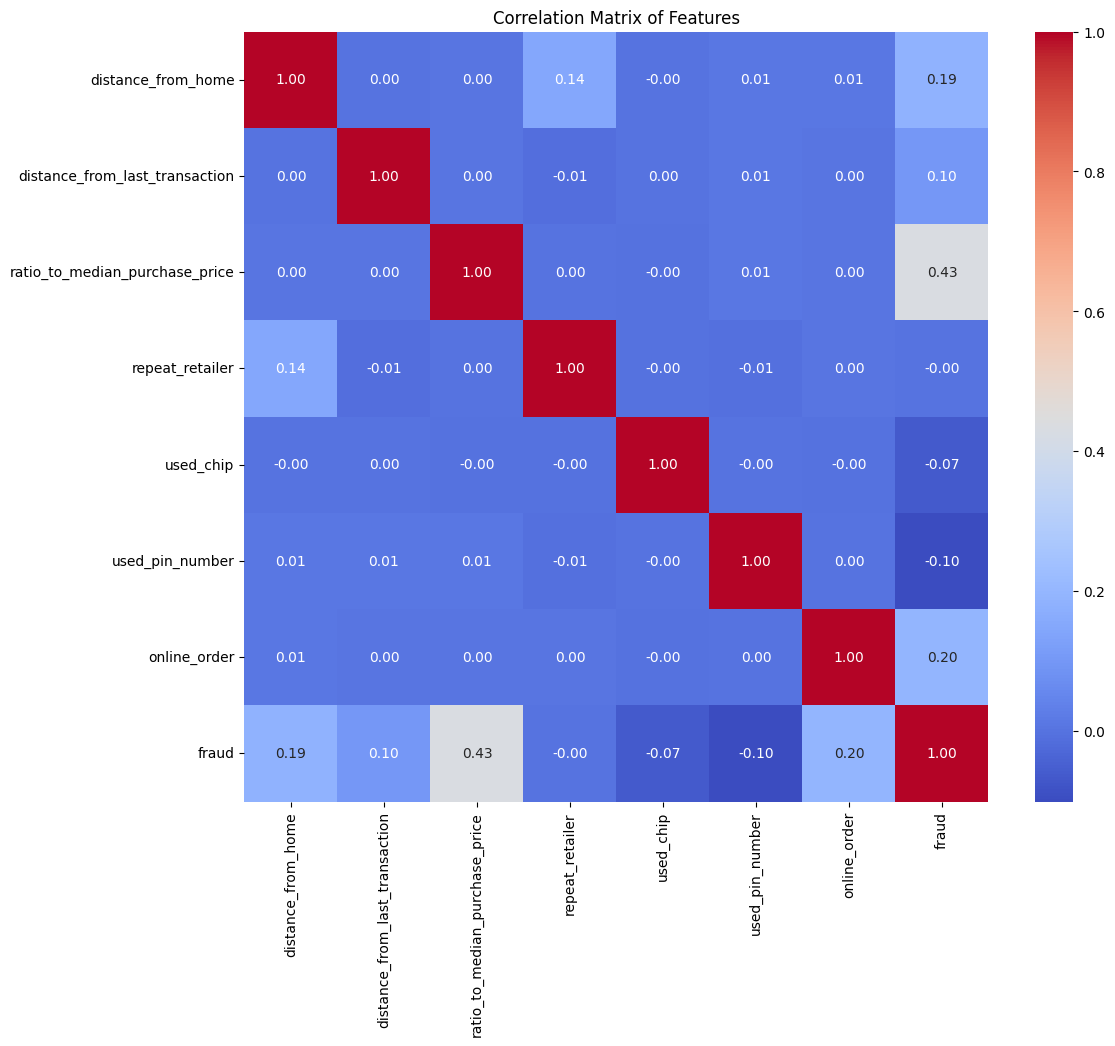

In [8]:
# prompt: correlacion entre las columnas para determinar que columnas utilizar

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Provem sols amb distance_from_home , ratio_to_median_purchase_price , online_roder i used_pin_number


In [9]:
df_reduit = df

In [10]:
df_reduit["fraud"].value_counts()

fraud
0.0    36496
1.0     3504
Name: count, dtype: int64

In [11]:
# División del conjunto de datos
train_set, val_set, test_set = train_val_test_split(df_reduit)

In [12]:
X_train = train_set.drop("fraud", axis=1)
y_train = train_set["fraud"].copy()

X_val = val_set.drop("fraud", axis=1)
y_val = val_set["fraud"].copy()

X_test = test_set.drop("fraud", axis=1)
y_test = test_set["fraud"].copy()

In [13]:
from sklearn.svm import SVC

In [14]:
# prompt: escala les dades mitjançant standarscaler

# Estandarditzar les dades
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [15]:
rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
        ])

rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=5))])

In [16]:
y_pred = rbf_kernel_svm_clf.predict(X_val)

In [17]:

from sklearn.metrics import accuracy_score
# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on validation set:", accuracy)

Accuracy on validation set: 0.992


In [18]:
# prompt: quiero el score

# Assuming 'y_val' and 'y_pred' are already defined from the previous code
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on validation set:", accuracy)

Accuracy on validation set: 0.992
